In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time 

In [4]:
plt.style.use('fivethirtyeight')

In [6]:
pd.set_option('display.max_columns',500)

In [7]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [8]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [9]:
from fredapi import Fred
fred_key = '3973b8bca07483888c4e789fc350cb7f'

In [10]:
fred = Fred(api_key=fred_key)

In [14]:
sp_search = fred.search('s&p', order_by = 'popularity')

In [15]:
sp_search.shape

(1000, 15)

In [16]:
#pull raw data

In [18]:
sp500 = fred.get_series(series_id = 'SP500')

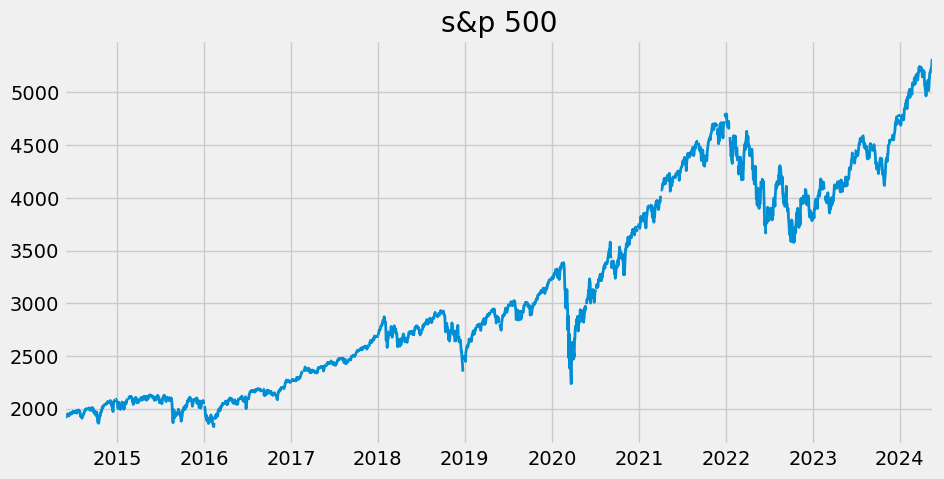

In [22]:
sp500.plot(figsize = (10,5), title = 's&p 500',lw=2)
plt.show()

In [23]:
#pull and join multiple data series

In [24]:
unemp_results = fred.search('unemployement')

In [25]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-05-27   2024-05-27   
UNRATENSA                          UNRATENSA     2024-05-27   2024-05-27   
UNEMPLOY                            UNEMPLOY     2024-05-27   2024-05-27   
NROU                                    NROU     2024-05-27   2024-05-27   
CCSA                                    CCSA     2024-05-27   2024-05-27   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-05-27   2024-05-27   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-05-27   2024-05-27   
LNS14000315                      LNS14000315     2024-05-27   2024-05-27   
LNU04032222                      LNU04032222     2024-05-27   2024-05-27   
LNU04032223                      LNU04032223     2024-05-27   2024-05-27   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-04-01   
UNRATENSA                    1948-01-01      2024-04-01   
UNEMPLOY                     1948-01-01      2024-04-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-05-11   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-04-01   
LNU04032222                  2000-01-01      2024-04-01   
LNU04032223                  2000-01-01      2024-04-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [26]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

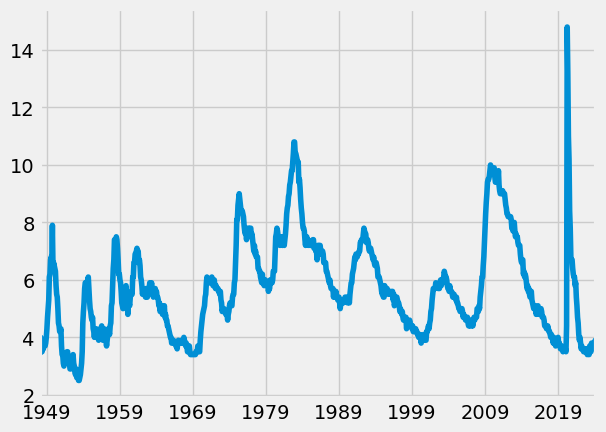

In [29]:
unrate.plot()

In [35]:
unemp_df = fred.search('unemployment rate state',filter = ('frequency','Monthly'))

In [37]:
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-05-27   2024-05-27   
UNRATENSA      UNRATENSA     2024-05-27   2024-05-27   
LNS14000006  LNS14000006     2024-05-27   2024-05-27   
UNEMPLOY        UNEMPLOY     2024-05-27   2024-05-27   
LNU04000006  LNU04000006     2024-05-27   2024-05-27   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-05-27   2024-05-27   
SCMARI7URN    SCMARI7URN     2024-05-27   2024-05-27   
VAALBE7URN    VAALBE7URN     2024-05-27   2024-05-27   
HAGE124UR      HAGE124UR     2024-05-27   2024-05-27   
MIINGH5URN    MIINGH5URN     2024-05-27   2024-05-27   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-04-01   Monthly               M   
UNRATENSA          1948-01-01      2024-04-01   Monthly               M   
LNS14000006        1972-01-01      2024-04-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-04-01   Monthly               M   
LNU04000006        1972-01-01      2024-04-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-04-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-03-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-03-01   Monthly               M   
HAGE124UR          1990-01-01      2024-03-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-03-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [40]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [42]:
unemp_df.title

series id
UNRATE                                                Unemployment Rate
LNS14000006               Unemployment Rate - Black or African American
U6RATE                Total Unemployed, Plus All Persons Marginally ...
CAUR                                    Unemployment Rate in California
TXUR                                         Unemployment Rate in Texas
                                            ...                        
LNS14000150                             Unemployment Rate - Married Men
NEIPTERM156SFRBRIC    Hornstein-Kudlyak-Lange Non-Employment Index i...
LBSSA10                     Labor Force Participation Rate for Delaware
LBSSA44                 Labor Force Participation Rate for Rhode Island
LRUN25TTUSM156S       Infra-Annual Labor Statistics: Unemployment Ra...
Name: title, Length: 161, dtype: object

In [45]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [48]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [49]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [50]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [52]:
# Plot States Unemployment Rate
px.line(uemp_states)

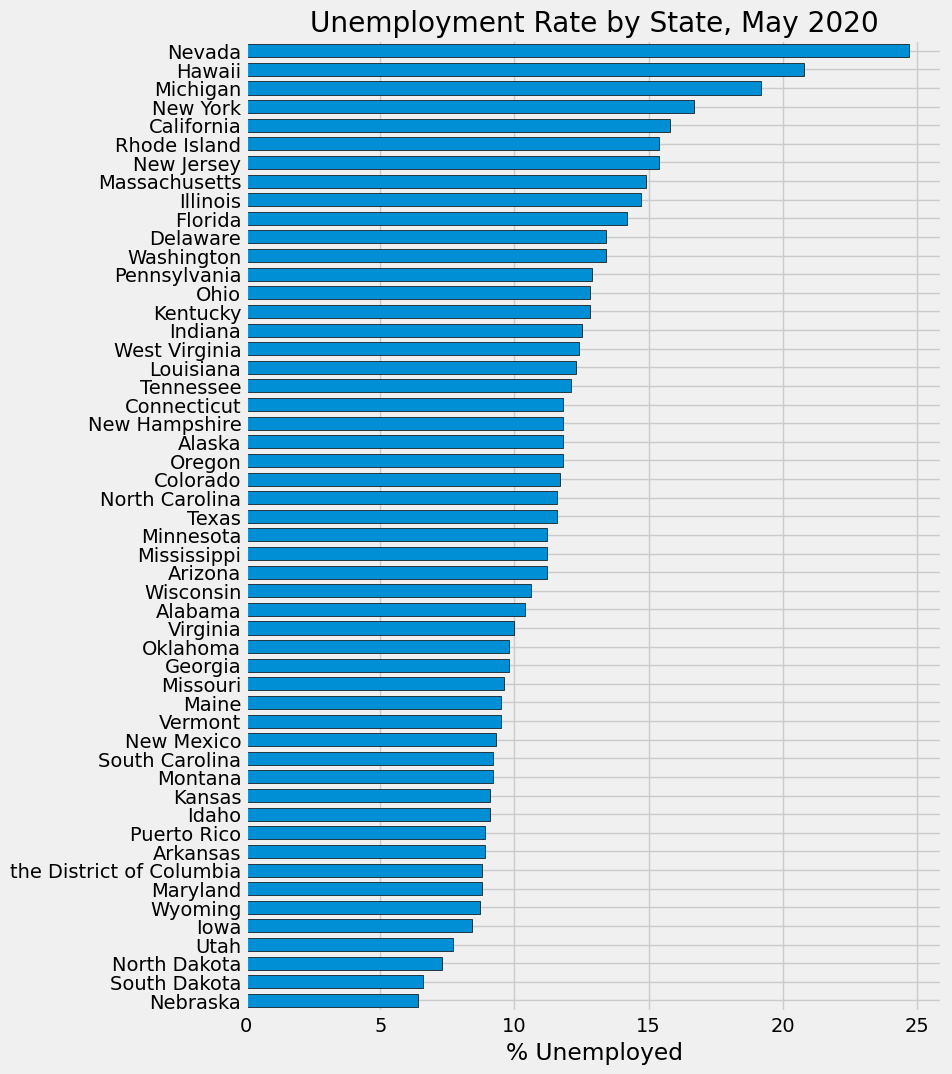

In [53]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [54]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [55]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [56]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

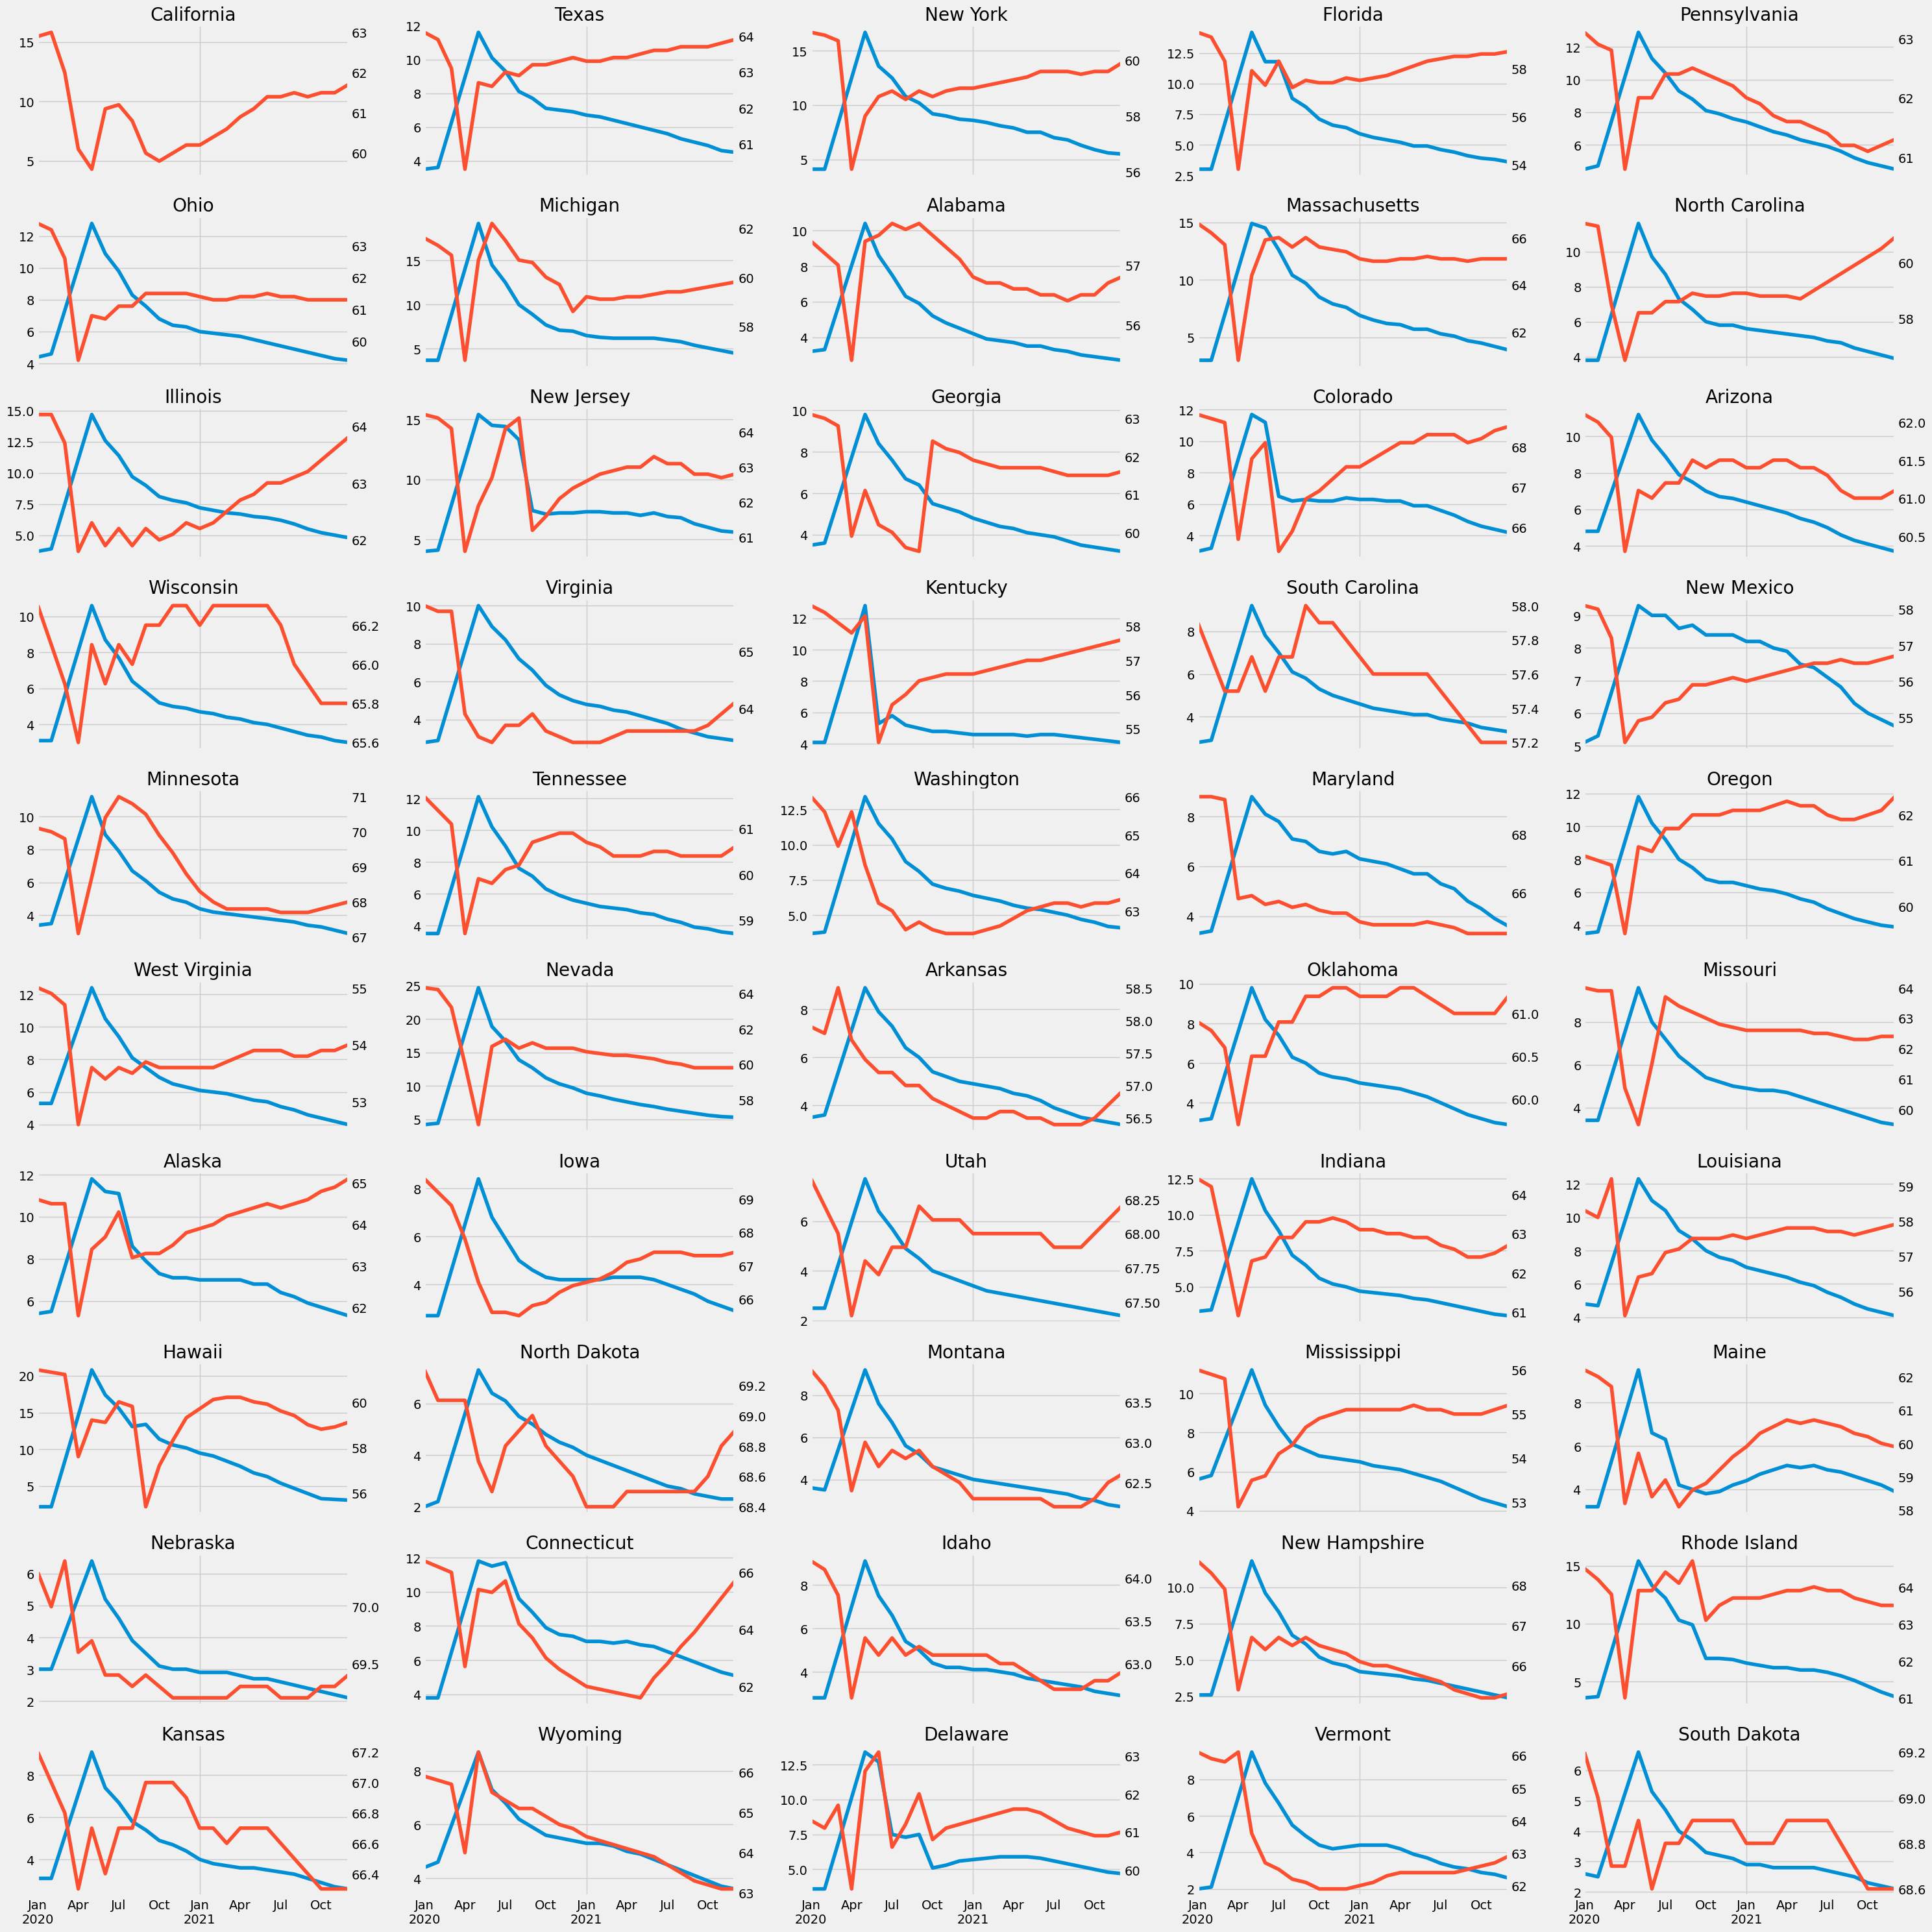

In [57]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

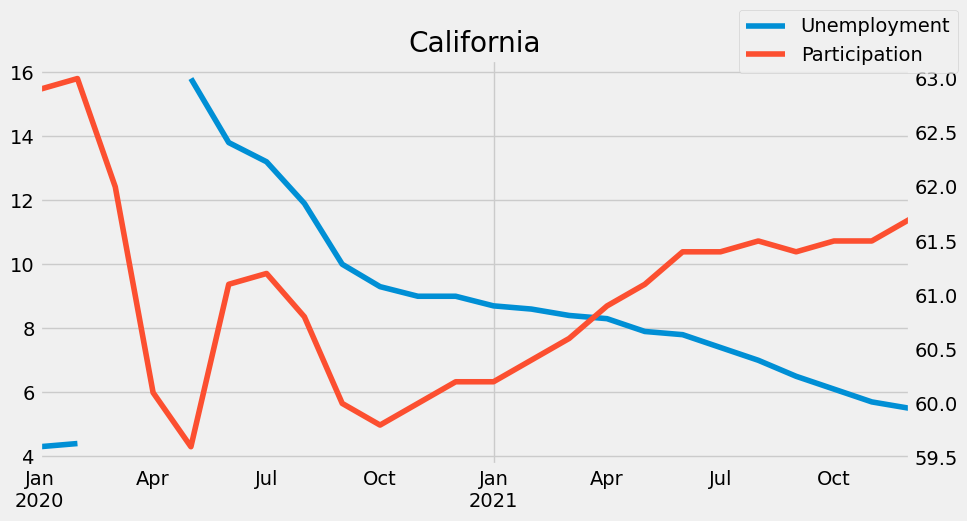

In [58]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()